<a href="https://colab.research.google.com/github/Blueblack319/yb-assignments/blob/main/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 28 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# data set: kaggle <Titanic - Machine Learning from Disaster>
# https://www.kaggle.com/competitions/titanic/overview
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/YBIGTA/Visualization/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


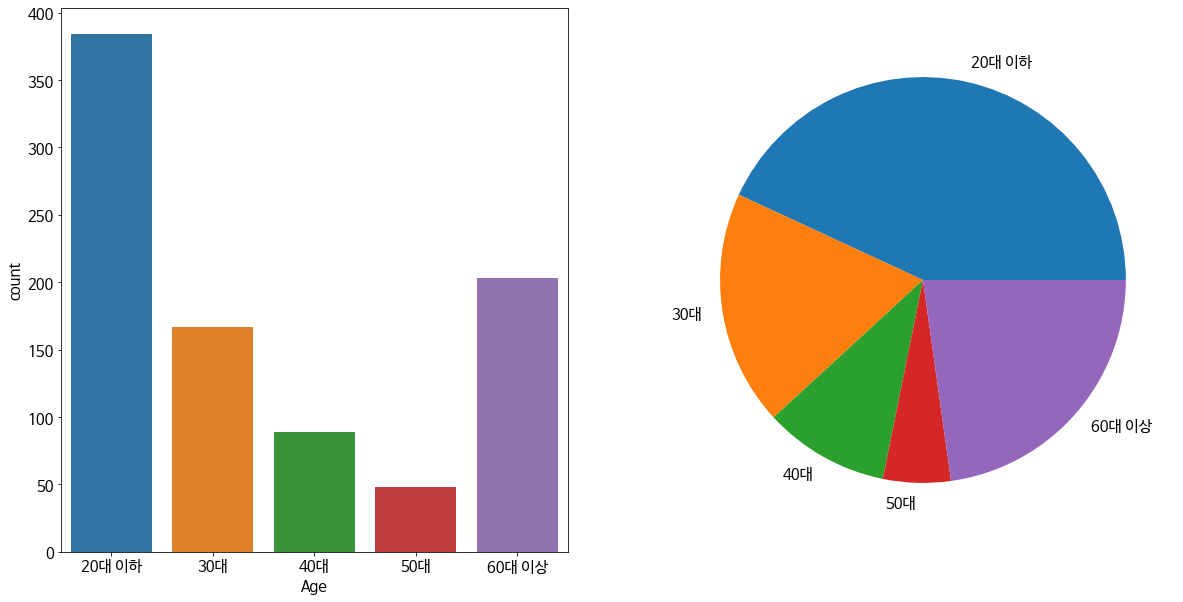

In [13]:
df_pie = df.copy()
plt.rc('font', family='NanumBarunGothic', size=15)
df_pie.Age = df_pie.Age.apply(lambda x: '20대 이하' if x < 30 else '30대' if x < 40 else '40대' if x < 50 else '50대' if x < 60 else '60대 이상')
df_pie['count'] = 1
df_pie = df_pie[['Age', 'count']].groupby('Age').agg(sum).reset_index()
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Bar Chart
sns.barplot(data=df_pie, x='Age', y='count', ax=ax[0])

# Pie Chart
plt.pie(df_pie['count'], labels = df_pie['Age'])
plt.show()

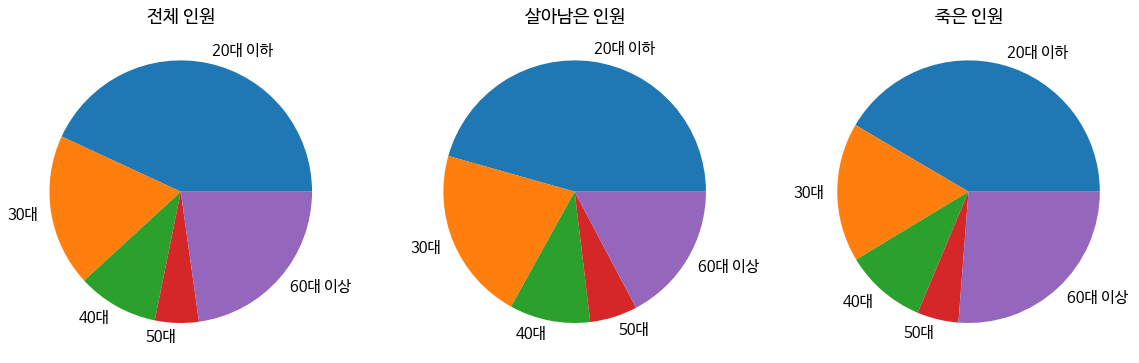

In [33]:
df_pie = df.copy()
# plt.rc('font', family='NanumBarunGothic', size=15)
df_pie.Age = df_pie.Age.apply(lambda x: '20대 이하' if x < 30 else '30대' if x < 40 else '40대' if x < 50 else '50대' if x < 60 else '60대 이상')
df_pie['count'] = 1
df_pie_dead = df_pie[df_pie['Survived'] == 0]
df_pie_survived = df_pie[df_pie['Survived'] == 1]
df_pie_dead = df_pie_dead[['Age', 'count']].groupby('Age').agg(sum).reset_index()
df_pie_survived = df_pie_survived[['Age', 'count']].groupby('Age').agg(sum).reset_index()
df_pie = df_pie[['Age', 'count']].groupby('Age').agg(sum).reset_index()

fig, ax = plt.subplots(1, 3, figsize=(20, 10))
plt.rc('font', family='NanumBarunGothic', size=15)

# Pie Chart
ax[0].set_title('전체 인원')
ax[0].pie(df_pie['count'], labels = df_pie['Age'])
ax[1].set_title('살아남은 인원')
ax[1].pie(df_pie_survived['count'], labels = df_pie_survived['Age'])
ax[2].set_title('죽은 인원')
ax[2].pie(df_pie_dead['count'], labels = df_pie_dead['Age'])

plt.show()

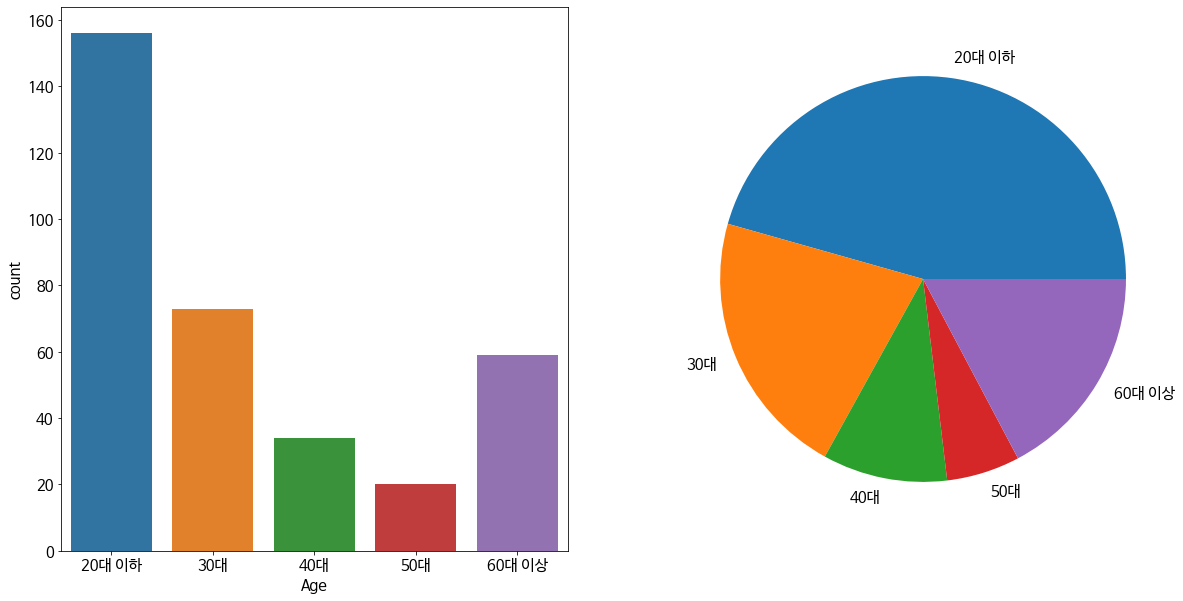

In [4]:
df_pie = df.copy()
plt.rc('font', family='NanumBarunGothic', size=15)
df_pie.Age = df_pie.Age.apply(lambda x: '20대 이하' if x < 30 else '30대' if x < 40 else '40대' if x < 50 else '50대' if x < 60 else '60대 이상')
df_pie['count'] = 1
df_pie = df_pie[df_pie['Survived'] == 1]
df_pie = df_pie[['Age', 'count']].groupby('Age').agg(sum).reset_index()

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
plt.rc('font', family='NanumBarunGothic', size=15)

# Bar Chart
sns.barplot(data=df_pie, x='Age', y='count', ax=ax[0])

# Pie Chart
plt.pie(df_pie['count'], labels = df_pie['Age'])

plt.show()